In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.ticker as ticker

In [7]:
import datetime as dt

In [8]:
data = pd.read_csv("gemini_BTCUSD_day.csv")
data.index = data.index[::-1]
data = data.reindex(index=data.index[::-1])

In [9]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
1,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
3,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
4,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743


In [10]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2289,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
2290,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
2291,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
2292,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2293,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715


In [11]:
data_close = data['Close']

In [12]:
data_close = data_close.values.reshape(len(data_close), 1)

In [13]:
data_date = [None] * len(data['Date'])
for index, i in enumerate(data['Date']):
   data_date[index] = i[6:10] + i[3:5] + i[0:2]

In [14]:
ticker_spacing = data_date
ticker_spacing = 90 # 3 month

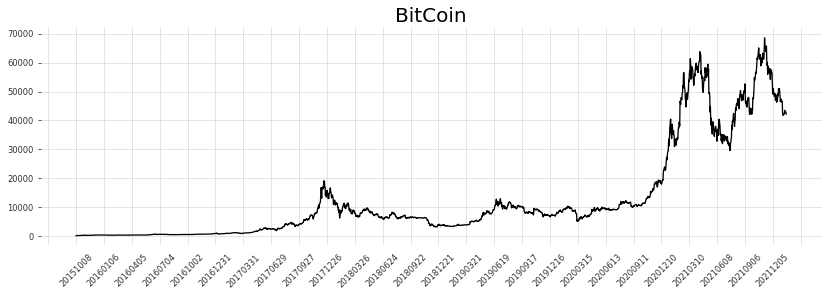

In [25]:
fig, ax = plt.subplots(1,1)
ax.plot(data_date,data_close)
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(rotation = 45)
plt.title("BitCoin", fontsize=20)
plt.show()

In [ ]:
#

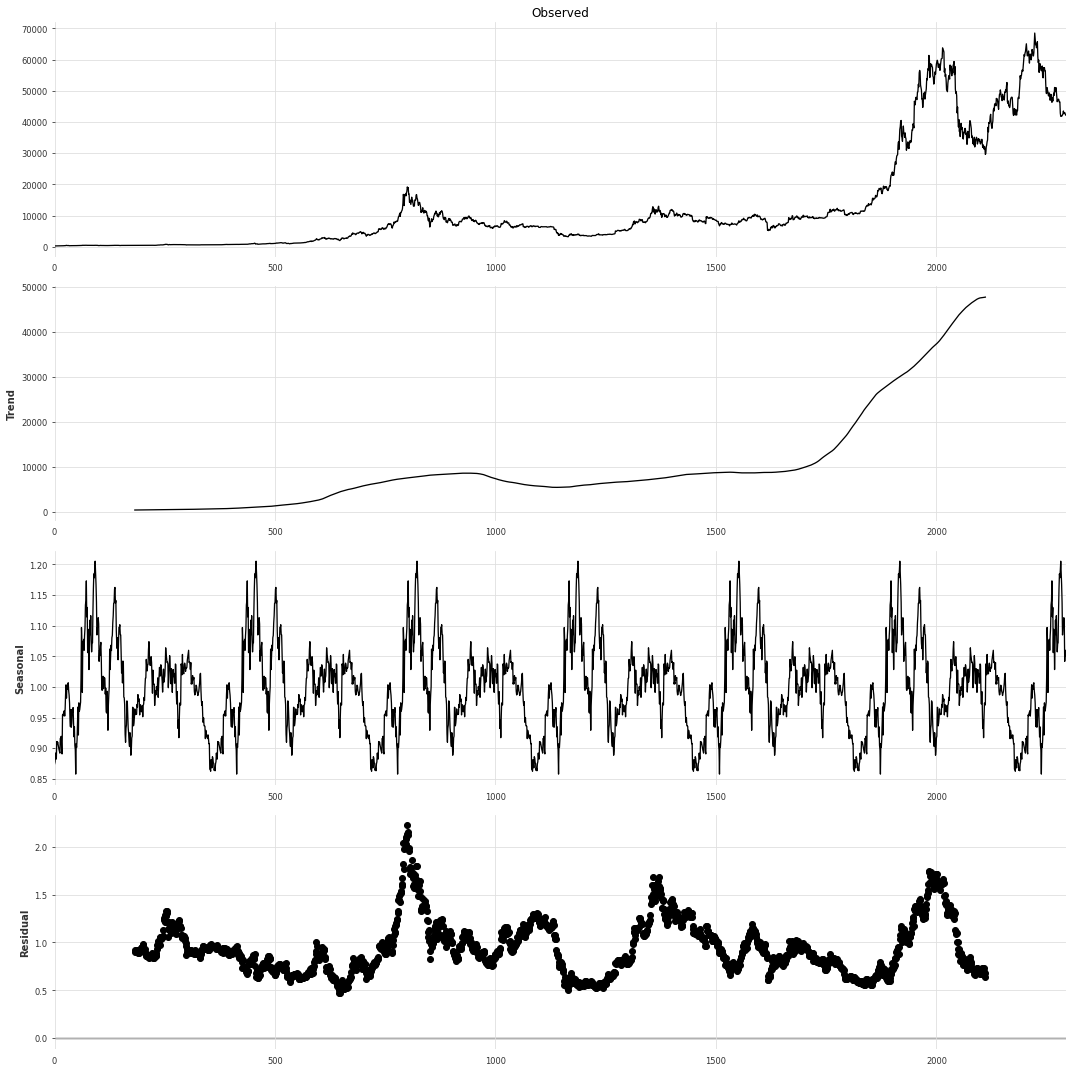

In [16]:
# multiplicative Decomposition: yt = St x Tt x Et*
forecast = seasonal_decompose(data['Close'].values, 'multiplicative', period=365)
plt.rcParams.update({'figure.figsize': (15,15)})
forecast.plot()
plt.show()

In [ ]:
# Darts

In [17]:
data['Date'] = data_date

In [18]:
data['Date']

0       20151008
1       20151009
2       20151010
3       20151011
4       20151012
          ...   
2289    20220113
2290    20220114
2291    20220115
2292    20220116
2293    20220117
Name: Date, Length: 2294, dtype: object

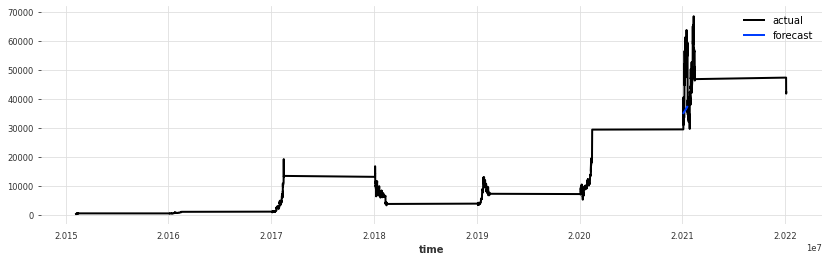

<Figure size 1008x288 with 0 Axes>

In [27]:
series = TimeSeries.from_dataframe(data,'Date','Close')
#train, val = series[:-365], series[-365:]
train, val = series.split_before(len(data) - 365)
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.rcParams["figure.figsize"] = (14,4)
plt.legend()
plt.figure()
plt.show()

In [ ]:
# FBprophet

In [49]:
df = pd.read_csv("gemini_BTCUSD_day.csv", usecols = ['Date','Close'])

In [50]:
df = df[::-1]

In [47]:
from prophet import Prophet

In [51]:
df.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [52]:
df.head()

,ds,y
2293,08/10/2015 04:00,243.60
2292,09/10/2015 04:00,245.51
2291,10/10/2015 04:00,246.30
2290,11/10/2015 04:00,248.98
2289,12/10/2015 04:00,245.75


In [55]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -50.5788


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4324.12     0.0158351       275.075      0.8916      0.8916      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       4333.16    0.00204845       583.541   4.016e-06       0.001      187  LS failed, Hessian reset 
     199        4340.4    0.00278146       83.6399      0.9769      0.9769      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4343.63    0.00256008       66.7226      0.2262           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       4347.43    0.00209817       143.266   1.825e-05       0.001      507  LS failed, Hessian reset 
     384       4348.23   0.000813734       99.9825    9.33e-06       0.001      590  LS failed, Hessian reset 
     399       4348.27   2.45477e-05  

In [56]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
2654,2023-11-27 04:00:00
2655,2023-11-28 04:00:00
2656,2023-11-29 04:00:00
2657,2023-11-30 04:00:00
2658,2023-12-01 04:00:00


In [57]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2654,2023-11-27 04:00:00,112102.900244,104085.401803,120593.366455
2655,2023-11-28 04:00:00,112002.985973,104173.484488,119851.672041
2656,2023-11-29 04:00:00,112052.926707,104093.386179,120208.987777
2657,2023-11-30 04:00:00,111917.161076,104009.442085,120201.860843
2658,2023-12-01 04:00:00,111830.515469,103611.221272,119819.081644


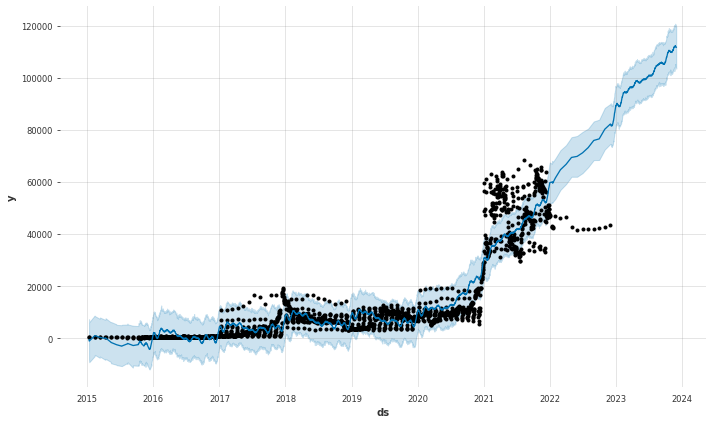

In [58]:
fig1 = m.plot(forecast)

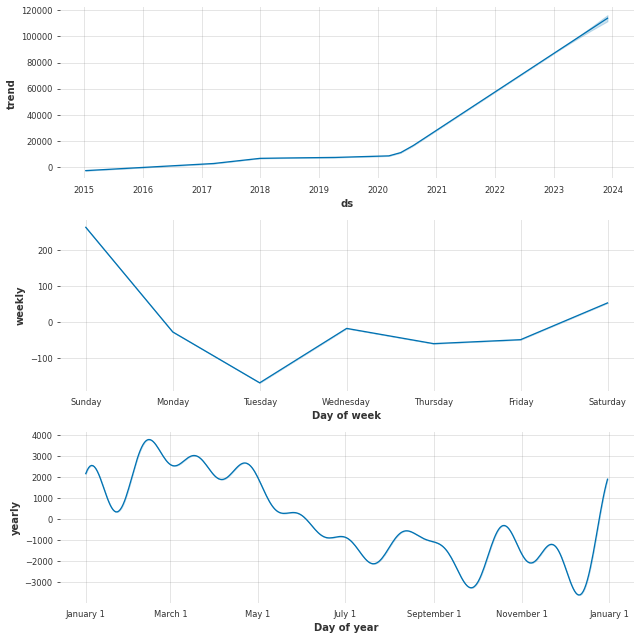

In [59]:
fig2 = m.plot_components(forecast)